# Liner regression with MCMC
#### In this lecture, we describe parameter estimation with Markov chain Monre Carlo (MCMC) method.
#### First, we would like to demonstrate how to use jupyter notebook with Python for the data analysis.

In [1]:
# import python libraries for this notebook
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats
from scipy.stats import norm
from tqdm import tnrange

If you find "ImportError", you might miss install some libraries.
In that case, you run the following line on a new cell:

> if you can use conda -> !conda install """library name(e.g. scipy, tqdm)""" --yes

> if you can use pip -> !pip install """library name(e.g. scipy, tqdm)"""

In [2]:
# Set the fontsize on this notebook
plt.rcParams['font.size'] = 30

## 1) Read the data 
Python is easy to read a datafile with pandas.

"pandas" is a library providing high-performance, easy-to-use data structures and data analysis tools for the Python programming language

In [3]:
# Read the csv file which contains VLA-COSMOS survay data (Laigle et al. 2016; Smolcic et al. 2017)
df_COSMOS = pd.read_csv('PythonLectureAtEASW19.csv', index_col=0)

# Set the number of columns showing on this notebook
pd.set_option('display.max_columns', len(df_COSMOS.columns), 'display.max_info_columns', len(df_COSMOS.columns))

## 2) Check the data
Pandas has many attributes for a quick-looking at the datafile.

In [4]:
# Show the datatype of "df_COSMOS" -> this data is called "pandas dataframe"
display(type(df_COSMOS))

pandas.core.frame.DataFrame

In [5]:
# Show the shape of "df_COSMOS" -> (# of rows, # of columns)
display(df_COSMOS.shape)

(8631, 24)

In [6]:
# Show the first n (default : n=5) rows
display(df_COSMOS.head())

,zbest,F3GHz,logL10cm,logL21cm,logLTIRSF,SFG,MNUV,MU,MB,MV,MR,MI,MZ,MY,MJ,MH,MK,MASS_MED,MASS_BEST,SFR_MED,SFR_BEST,L_NU,L_R,L_K
0,1.5457,16147.040,25.839252,25.717876,11.662600,0.0,-18.623,-21.464,-22.299,-22.895,-23.048,-23.374,-23.643,-23.797,-24.214,-24.530,-24.284,11.14200,11.13040,-1.405420,-1.437410,27.746549,29.877626,30.193749
1,1.5410,15602.200,26.238592,26.457530,11.540435,0.0,-21.098,-21.800,-21.964,-22.545,-22.783,-22.839,-23.229,-23.008,-23.349,-23.627,-23.510,10.05510,10.06290,2.390100,2.346580,30.332119,30.175826,30.110579
2,1.5550,11369.180,25.802593,25.771760,12.118613,0.0,-16.628,-18.416,-18.701,-19.737,-17.158,-20.573,-20.255,-20.408,-20.538,-20.761,-20.594,9.41667,9.48718,0.751766,0.353600,28.486889,28.870496,28.899489
3,2.4455,7746.012,26.569344,26.904280,12.010794,0.0,-19.770,-22.131,-23.097,-23.559,-23.815,-24.036,-24.248,-24.357,-24.466,-24.653,-24.444,11.05550,11.06550,-2.259780,-2.263600,28.375499,30.151526,30.382799
4,1.2590,9212.930,25.896793,26.196741,11.263206,0.0,-18.524,-20.865,-21.731,-22.408,-22.792,-23.254,-23.441,-23.656,-23.831,-24.116,-24.101,11.19990,11.22430,0.700190,0.749476,28.911759,30.003326,30.286759


In [7]:
# Show information of pandas dataframe (e.g. the number of non-null values)
display(df_COSMOS.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8631 entries, 0 to 8807
Data columns (total 24 columns):
zbest        8631 non-null float64
F3GHz        8631 non-null float64
logL10cm     8631 non-null float64
logL21cm     8631 non-null float64
logLTIRSF    8631 non-null float64
SFG          8631 non-null float64
MNUV         8631 non-null float64
MU           8631 non-null float64
MB           8631 non-null float64
MV           8631 non-null float64
MR           8631 non-null float64
MI           8631 non-null float64
MZ           8631 non-null float64
MY           8631 non-null float64
MJ           8631 non-null float64
MH           8631 non-null float64
MK           8631 non-null float64
MASS_MED     8631 non-null float64
MASS_BEST    8631 non-null float64
SFR_MED      8631 non-null float64
SFR_BEST     8631 non-null float64
L_NU         8631 non-null float64
L_R          8631 non-null float64
L_K          8631 non-null float64
dtypes: float64(24)
memory usage: 1.6 MB


None

In [8]:
# Show the statistics of each columns (count, mean, standard deviation(std), min, quartiles and max)
display(df_COSMOS.describe())

,zbest,F3GHz,logL10cm,logL21cm,logLTIRSF,SFG,MNUV,MU,MB,MV,MR,MI,MZ,MY,MJ,MH,MK,MASS_MED,MASS_BEST,SFR_MED,SFR_BEST,L_NU,L_R,L_K
count,8631.000000,8631.000000,8631.000000,8631.000000,8631.000000,8631.000000,8631.000000,8631.000000,8631.000000,8631.000000,8631.000000,8631.000000,8631.000000,8631.000000,8631.000000,8631.000000,8631.000000,8631.000000,8631.000000,8631.000000,8631.000000,8631.000000,8631.000000,8631.000000
mean,1.322454,117.042183,23.165601,23.410598,10.567795,0.629243,-22.539491,-20.788226,-21.426523,-21.917994,-22.215429,-22.540415,-22.835689,-23.038633,-23.251693,-23.548910,-23.430137,10.661476,10.668357,1.119998,0.762818,29.314036,29.950311,30.021740
std,0.840792,1282.494254,1.207466,1.223907,3.235726,0.483035,15.725004,1.201650,1.150912,1.135125,1.127440,1.130181,1.133250,1.142289,1.153212,1.162435,1.154851,0.501132,0.530574,1.264983,2.863733,0.946616,0.511620,0.473196
min,0.000000,10.819050,0.000000,0.000000,0.000000,0.000000,-97.729000,-24.280000,-24.805000,-25.221000,-25.597000,-25.667000,-26.143000,-26.522000,-26.883000,-27.352000,-27.377000,7.012500,5.317720,-5.974820,-31.315800,23.596159,24.735016,24.694819
25%,0.699550,16.468400,22.716698,22.953752,10.924591,0.000000,-20.165500,-21.550000,-22.143500,-22.620000,-22.905000,-23.228000,-23.522000,-23.725000,-23.944000,-24.234000,-24.104500,10.418700,10.419100,0.501507,0.463934,28.649159,29.679376,29.811774
50%,1.145800,25.696080,23.227410,23.464403,11.463945,1.000000,-19.112000,-20.861000,-21.513000,-22.006000,-22.306000,-22.630000,-22.931000,-23.143000,-23.360000,-23.662000,-23.536000,10.705600,10.724600,1.507640,1.424800,29.560719,29.978326,30.063189
75%,1.801950,44.174970,23.703326,23.943610,11.934950,1.000000,-18.047000,-20.129500,-20.811500,-21.332000,-21.651000,-21.988500,-22.293000,-22.502000,-22.718000,-23.037500,-22.922000,10.992300,11.000650,1.934220,1.895460,30.008519,30.273126,30.295034
max,6.062000,80250.000000,27.047028,27.512434,13.523303,1.000000,-11.464000,-8.428000,-9.083000,-9.373000,-9.574000,-9.847000,-9.915000,-9.976000,-10.065000,-10.223000,-10.503000,12.316700,12.323000,3.567890,3.589270,31.625819,31.611726,31.631439


## 3) Try to make a plot

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a185269e8>]],
      dtype=object)

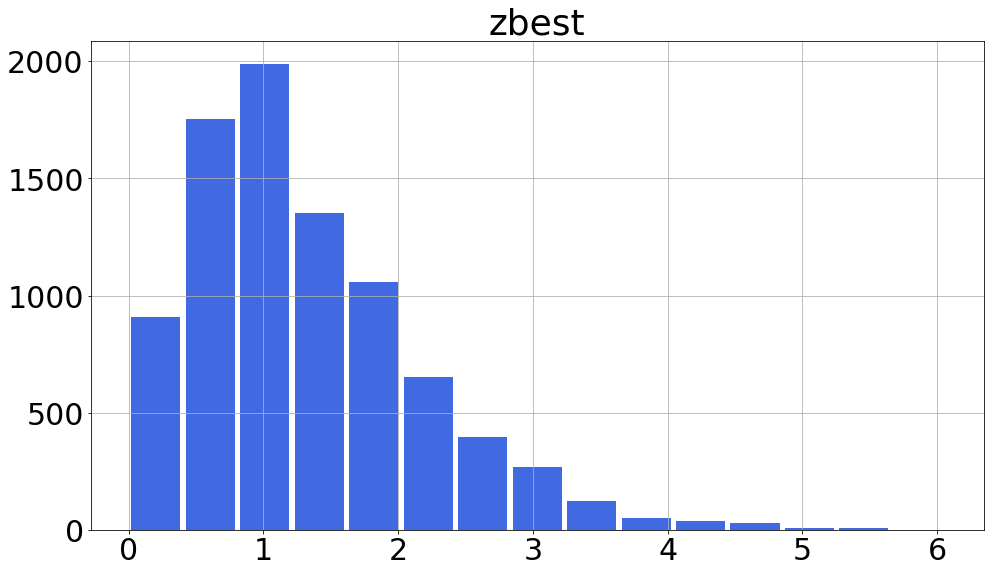

In [9]:
# Plot a histogram of redshift for all VLA-COSMOS samples
# pandas dataframe is easy to plot with attributes (e.g. .hist(), .plot())
df_COSMOS.hist(column='zbest', figsize=(16, 9), bins=15, rwidth=0.9, color='royalblue')

# Set the x and y labels
#plt.xlabel('Redshift')
#plt.ylabel('Counts')

# Change the y-scale into 'log'
#plt.yscale('log')

# Save this figure (if you want to output pdf file, you change .png into .pdf)
#plt.savefig('HistogramOfRedshift.png')

## 4) Try to do the Markov Chain Monte Carlo (MCMC)

Here, 
The distiburion of $M_*{\mbox -}L_K$ seems to be able to described as a liner relation with two parameters $a$ and $b$ which correspond to slope and intercept respectively.
$$
\log (M_*/M_{\odot})=a\log(L_K)+b
$$
The aim of this lecture is to detrmine these two parameters and their distribution with MCMC method.

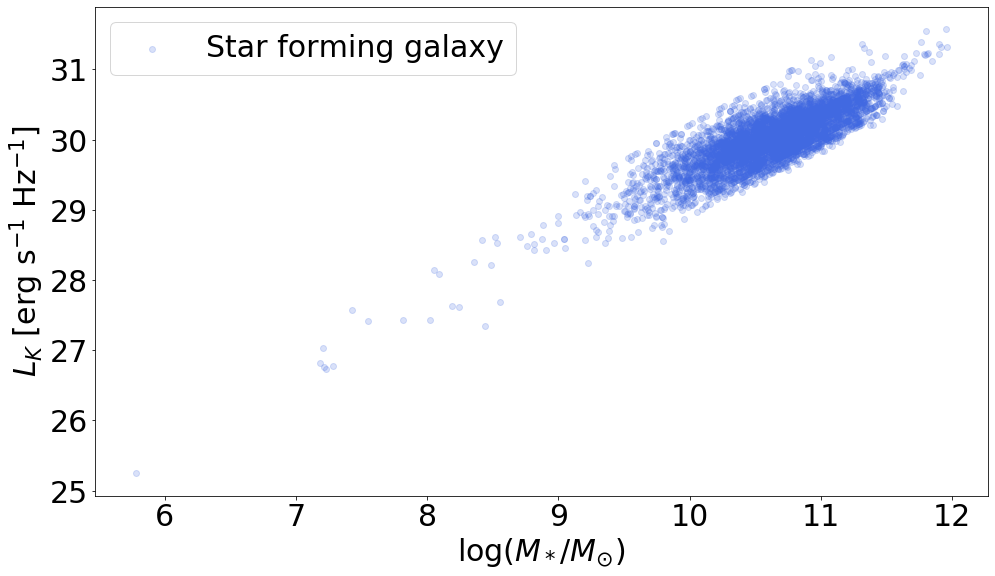

In [10]:
# Hereafter, we focus on star forming galaxies for more secure calculation
df_SFG = df_COSMOS.query('SFG == 1')

# Plot the figure
plt.figure(figsize=(16, 9))
plt.scatter(df_SFG['MASS_BEST'], df_SFG['L_K'], color='royalblue', alpha=0.2, label="Star forming galaxy")
plt.xlabel(r'$\log (M_*/M_{\odot})$')
plt.ylabel(r'$L_K$ $[{\rm erg\ s^{-1}\ Hz^{-1}}]$')

# When you want to show the label, you have to run the following line
plt.legend(loc='best')

Firstly, we need to assume a prior distribution of parameters.
In this lecture, we assume that the prior distribution of intercept and slope is normal distribution with mean $\mu=0.5$ and standard deviation $\sigma=0.5$.
$$
\mathcal{N}(\mu,\sigma)=\frac{1}{\sqrt{2\pi \sigma^2}}\exp{\biggl(-\frac{(x-\mu)^2}{2\sigma^2}\biggr)}
$$

In [11]:
def prior_probability(theta):
    a = theta[0]    # intercept
    b = theta[1]    # slope
    a_prior = scipy.stats.norm(0.5, 0.5).pdf(a)
    b_prior = scipy.stats.norm(0.5, 0.5).pdf(b)
    return np.log(a) + np.log(b)

The data is assumed to have normal disribution. Therefore the likelihood fucntion is obtained as below. To avoid underflow, the log-likelihood is often used. 

In [12]:
def likelihood_probability(theta):
    a = theta[0]    # intercept
    b = theta[1]    # slope
    y_predict = a  + b * df_SFG['MASS_BEST']
    likelihoods = scipy.stats.norm(y_predict, sigma_e).pdf(df_SFG['L_K']) 
    return np.sum(np.log(likelihoods))

The posterior distribution for each step can be calculated from likelihood probability and prior probability.

In [13]:
def posterior_probability(theta):
    return likelihood_probability(theta) + prior_probability(theta)

In [14]:
def proposal_function(theta):
    a = theta[0]
    b = theta[1]
    a_new = np.random.normal(a, 0.5)
    b_new = np.random.normal(b, 0.5)
    theta_new = [a_new, b_new]
    return theta_new

This part gives initial condistion of the Markov chain.  Here, $(a^{(0)},b^{(0)})=(0.5,0.5)$.

In [15]:
sigma_e = 3
N_iteration = 50000          # the number of the iteration
theta_0 = [0.5, 0.5]        # start value
results = np.zeros([N_iteration, 2])         
results[0, 0] = theta_0[0]
results[0, 1] = theta_0[1]

This is a sampling part. In each step of Markov chain, we adopt Mertopolis-Hastings (MH) algorithm. The MH algorithm is defined as below,
>Step1. Determine the initial value of parameter $\theta^{(0)}$. Here, ${\bf \theta}^{(0)}=(0.5,0.5)$ this time.

>Step2. Calculate the acceptance probability $\alpha$.
$$
\alpha(\theta^{(t-1)},\tilde{\theta}) = \min{\biggl\{1,\frac{q(\tilde{\theta}|\theta^{(t-1)})}{q(\theta^{(t-1)}|\tilde{\theta})}\frac{p(\tilde{\theta})}{p(\theta^{(t-1)})} \biggr\}}
$$

>Step3. Generate a random number with a uniform distribution, $U \in [0,1]$.

>Step4. The parameter for next step is determined from 
$$
\theta^{(t)}= \begin{cases}
\tilde{\theta} & (U \leq \alpha(\theta^{(t-1)},\tilde{\theta}) \\
\theta^{(t-1)} & (U>\alpha(\theta^{(t-1)},\tilde{\theta})).
\end{cases}
$$

>Step5. Repeat step 2, 3, 4 and obtain parameters $\theta^{0},\ \theta^{(1)},...$

This part takes about 10 minutes...

In [16]:
for step in tnrange(1, N_iteration):

    theta_old = results[step - 1, :]
    theta_proposal = proposal_function(theta_old)

    prob = np.exp(posterior_probability(theta_proposal) - posterior_probability(theta_old))

    if np.random.uniform(0,1) < prob:
        results[step, :] = theta_proposal    
    else:
        results[step, :] = theta_old

/Users/syoshida/.pyenv/versions/miniconda3-latest/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in log
  


In the Markov chain sampling, the chain is assumed to converge to an invariant distribution. A distirbution $\bar{p}$ is an invariant distribution of transition distirbution $Q(\theta,\tilde{\theta})$ when
$$
\bar{p}(\tilde{\theta})=\int^{\infty}_{\infty} \bar{p}(\theta)Q(\theta,\tilde{\theta}).
$$
Particulary, the posterior probability $p(\theta|D)$ need to be an invariant distribution for a Markov chain. Therefore, the first several steps are to be throw out since they are not still an invariant distribution. This process is called **burn-in**. We can set the number of the steps to be throw out in the box below. A small number may cause to accept posterior distribution that is not converge to an invariant distribution.

In [17]:
burn_in = 1000
theta_posterior = results[burn_in:, :]
print(theta_posterior.mean(axis=0))

[20.95967838  0.85353647]


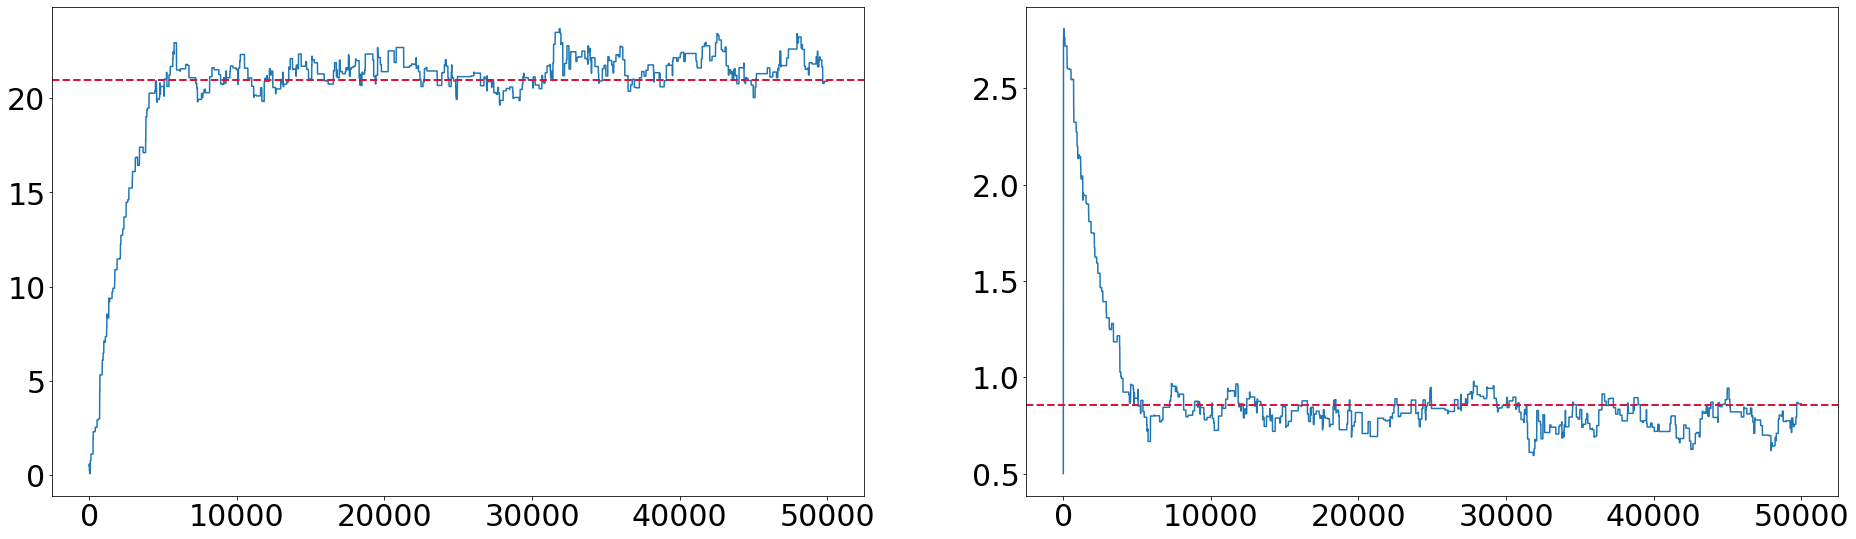

In [34]:
fig = plt.figure(figsize=(32, 9))
x_ = np.linspace(0, 50000, 50000)
ax1 = fig.add_subplot(121)
ax1.plot(x_, results[:, 0])
ax1.axhline(theta_posterior.mean(axis=0)[0], color='crimson', linestyle='dashed', linewidth=2)

ax2 = fig.add_subplot(122)
ax2.plot(x_, results[:, 1])
ax2.axhline(theta_posterior.mean(axis=0)[1], color='crimson', linestyle='dashed', linewidth=2)

In [18]:
mean = theta_posterior.mean(axis=0)
variance = theta_posterior.var(axis=0)
sigma = np.sqrt(theta_posterior.mean(axis=0))

The final distribution of the two parameters are displayed as histograms.

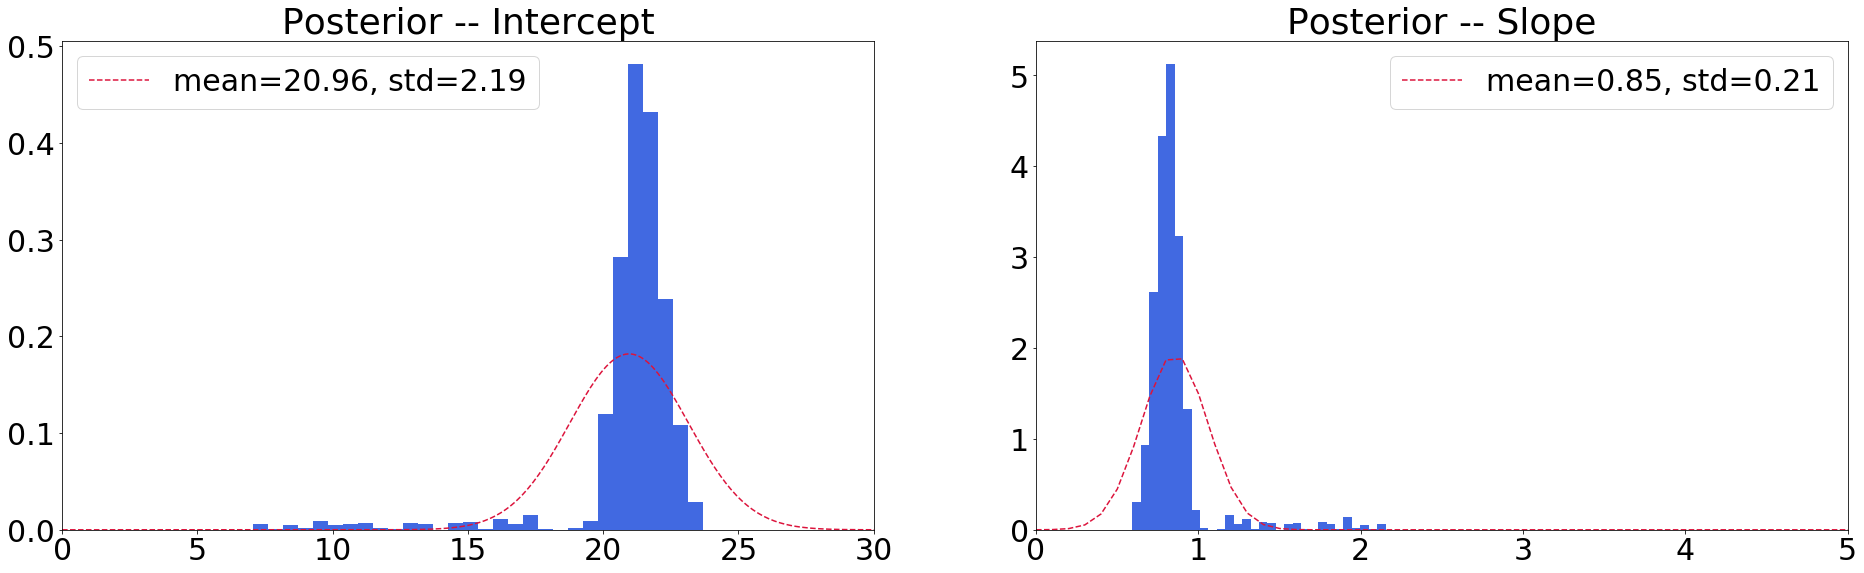

In [19]:
# gaussian fitting for an intercept
param1 = norm.fit(theta_posterior[:,0])

# gaussian fitting and plot for a slope
param2 = norm.fit(theta_posterior[:,1])

fig = plt.figure(figsize=(32, 9))
x_plot = np.linspace(0, 100, 1000)

ax1 = fig.add_subplot(121)
ax1.hist(theta_posterior[:,0], bins=30, color='royalblue', density=True)
ax1.plot(x_plot, norm.pdf(x_plot, loc=param1[0], scale=param1[1]), color='crimson', linestyle='dashed', label='mean=%s, std=%s' % ('{:.2f}'.format(param1[0]), '{:.2f}'.format(param1[1])))
ax1.legend(loc='best')
ax1.set_xlim([0, 30])
ax1.title.set_text('Posterior -- Intercept')

ax2 = fig.add_subplot(122)
ax2.hist(theta_posterior[:,1], bins=30, color='royalblue', density=True)
ax2.plot(x_plot, norm.pdf(x_plot, loc=param2[0], scale=param2[1]), color='crimson', linestyle='dashed', label='mean=%s, std=%s' % ('{:.2f}'.format(param2[0]), '{:.2f}'.format(param2[1])))
ax2.legend(loc='best')
ax2.set_xlim([0, 5])
ax2.title.set_text('Posterior -- Slope')

Finally, we can confirm that the model line with obtained parameters represents the original data distribution.

Text(0.5, 0, '$\\log (M_*/M_{\\odot})$')

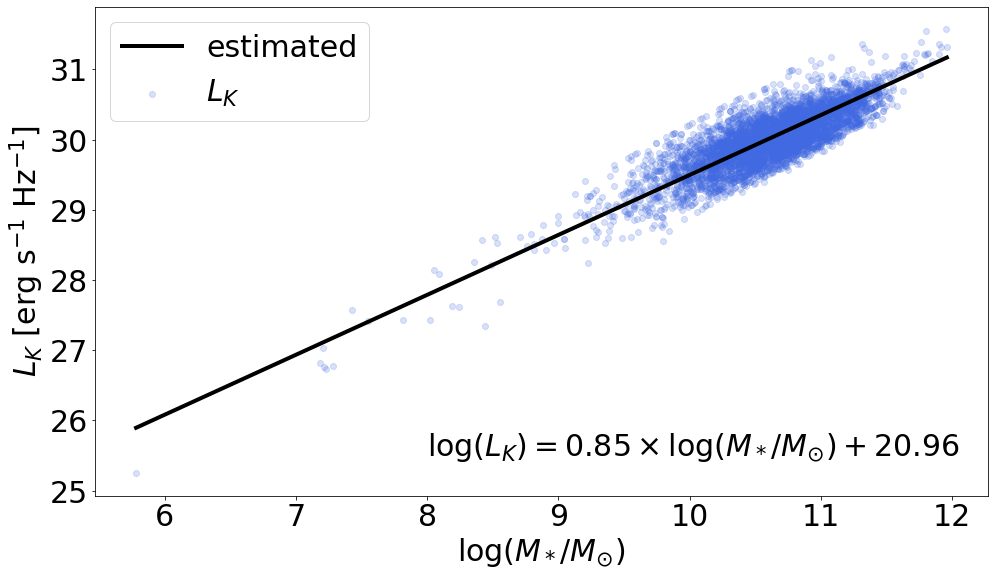

In [20]:
fig = plt.figure(figsize=(16, 9))
x_plot=np.linspace(df_SFG['MASS_BEST'].min(), df_SFG['MASS_BEST'].max(), 1000)
plt.scatter(df_SFG['MASS_BEST'], df_SFG['L_K'], color='royalblue', alpha=0.2, label='$L_K$')
plt.plot(x_plot, param2[0] * x_plot + param1[0], lw=4, color='k', label='estimated')
plt.legend(loc='best')
plt.text(8, 25.5, r'$\log{(L_K)}=%01.2f \times \log{(M_*/M_{\odot})}+%01.2f$'%(param2[0], param1[0]), size=30)
plt.ylabel(r'$L_K$ $[{\rm erg\ s^{-1}\ Hz^{-1}}]$')
plt.xlabel(r'$\log (M_*/M_{\odot})$')